In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = ['Age', 'Op_Year', 'axil_nodes', 'Surv_status']
df = pd.read_csv('haberman.csv', names=cols)
df

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


# Exploratory Data Analysis

In [3]:
print(df.shape)
print('=' * 50)
print(df.info())

(306, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          306 non-null    int64
 1   Op_Year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   Surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [4]:
df.isnull().sum()

Age            0
Op_Year        0
axil_nodes     0
Surv_status    0
dtype: int64

In [5]:
df.duplicated().sum()

17

In [6]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)

In [7]:
df.drop('index', axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Op_Year'}>],
       [<AxesSubplot:title={'center':'axil_nodes'}>,
        <AxesSubplot:title={'center':'Surv_status'}>]], dtype=object)

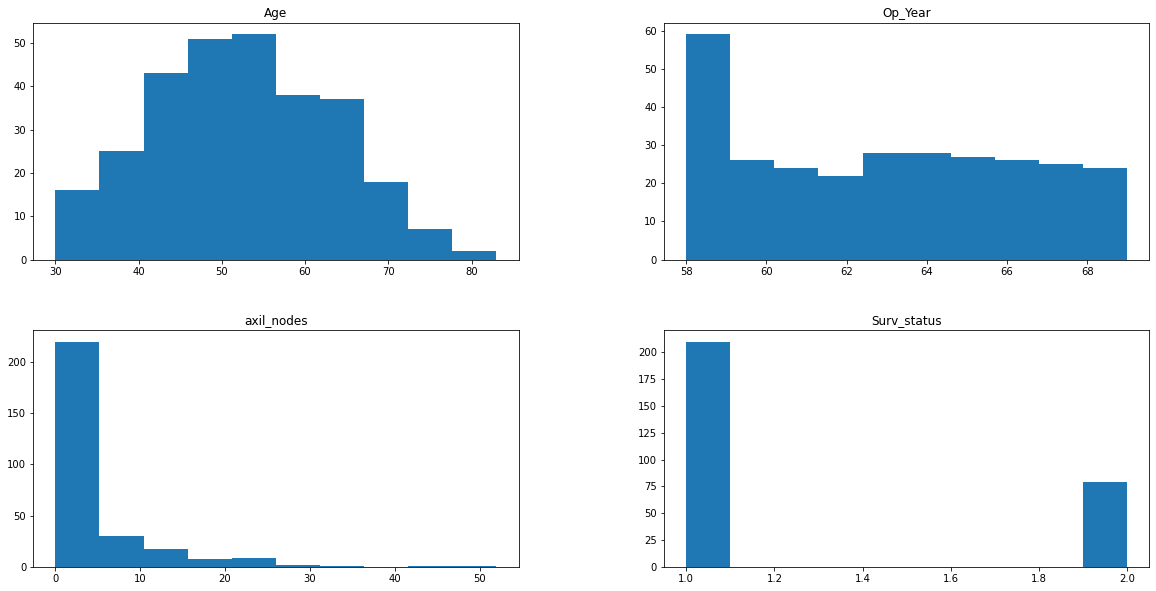

In [8]:
df.hist(bins=10, grid=False, figsize=(20,10))

In [9]:
df['Surv_status'].unique()

array([1, 2])

In [10]:
X = df.drop(['Surv_status'], axis=1)
y = df['Surv_status']

# Splitting Dataset

In [11]:
# Split data X dan Y 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

# Feature Scaling

In [12]:
# harus dilakukan standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X_train)
X_scaler = pd.DataFrame(X_scaler,columns = X_train.columns)

In [13]:
def evaluasi(model,X_test,y_test):
    from sklearn.metrics import accuracy_score

    X_scaler_test = scaler.transform(X_test)
    y_pred = model.predict(X_scaler_test)
    
    return accuracy_score(y_test,y_pred)*100

def prediksi(model,X_test):
    X_scaler = scaler.transform(X_test)
    return model.predict(X_scaler)

In [14]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=2)
model_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [15]:
y_pred = model_tree.predict(X_test)

In [16]:
evaluasi(model_tree,X_test,y_test)

71.23287671232876

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Confusion Matrix \n {}'.format(confusion_matrix(y_test, y_pred)))
print('Accuracy Score {:.2f}'.format(accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))

Confusion Matrix 
 [[42 10]
 [13  8]]
Accuracy Score 68.49
              precision    recall  f1-score   support

           1       0.76      0.81      0.79        52
           2       0.44      0.38      0.41        21

    accuracy                           0.68        73
   macro avg       0.60      0.59      0.60        73
weighted avg       0.67      0.68      0.68        73

